<a href="https://colab.research.google.com/github/sergeGITH/TS/blob/main/TMDL_group_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# download latest version
path = kagglehub.dataset_download("joebeachcapital/loan-default")

print("Path to dataset files:", path)

100%|██████████| 2.80M/2.80M [00:00<00:00, 23.5MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/joebeachcapital/loan-default/versions/1


In [ ]:
import os

# list files in the dataset folder
dataset_folder = "/root/.cache/kagglehub/datasets/joebeachcapital/loan-default/versions/1/"
files = os.listdir(dataset_folder)

print("Files in dataset folder:", files)

Files in dataset folder: ['Anonymize_Loan_Default_data.csv']


In [ ]:
import pandas as pd

file_path = os.path.join(dataset_folder, 'Anonymize_Loan_Default_data.csv')

# load the dataset into a df
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# display the first few rows to confirm its loaded correctly
print(df.head())

   Unnamed: 0      id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0           2       2          2        0.0          0.0              0.0   
1           3  545583     703644     2500.0       2500.0           2500.0   
2           4  532101     687836     5000.0       5000.0           5000.0   
3           5  877788    1092507     7000.0       7000.0           7000.0   
4           6  875406    1089981     2000.0       2000.0           2000.0   

        term  int_rate  installment emp_length  ... total_acc  total_pymnt  \
0  36 months      0.00         0.00   < 1 year  ...       1.0     0.000000   
1  36 months     13.98        85.42    4 years  ...      10.0  3075.291779   
2  36 months     15.95       175.67    4 years  ...      15.0  2948.760000   
3  36 months      9.91       225.58  10+ years  ...      20.0  8082.391880   
4  36 months      5.42        60.32  10+ years  ...      15.0  2161.663244   

  total_pymnt_inv total_rec_prncp total_rec_int last_pymnt_d last_py

In [ ]:
# get descriptive statistics
print(df.describe())

         Unnamed: 0            id     member_id     loan_amnt   funded_amnt  \
count  38480.000000  3.848000e+04  3.848000e+04  38479.000000  38479.000000   
mean   19240.500000  6.649979e+05  8.261899e+05  11094.727644  10831.856337   
std    11108.363516  2.192322e+05  2.793531e+05   7405.416042   7146.853682   
min        1.000000  1.000000e+00  1.000000e+00      0.000000      0.000000   
25%     9620.750000  4.983645e+05  6.384620e+05   5200.000000   5100.000000   
50%    19240.500000  6.443195e+05  8.242545e+05   9750.000000   9600.000000   
75%    28860.250000  8.265608e+05  1.034706e+06  15000.000000  15000.000000   
max    38480.000000  1.077430e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv     int_rate   installment    annual_inc           dti  \
count     38479.000000  38480.00000  38479.000000  3.847800e+04  38480.000000   
mean      10150.141518     12.16430    323.163255  6.899531e+04     13.378119   
std        7128.026828      3.73744    209.08

In [ ]:
# define the columns to keep
columns_to_keep = [
    "id", "funded_amnt", "term", "int_rate", "installment", "emp_length",
    "home_ownership", "annual_inc", "verification_status", "loan_status", "purpose",
    "zip_code", "addr_state", "dti", "delinq_2yrs", "inq_last_6mths",
    "pub_rec", "total_acc", "repay_fail"
]

# keep only the selected columns
df_filtered = df[columns_to_keep]

# display the filtered DataFrame
print(df_filtered.head())

# optionally, save the new DataFrame to a CSV file
df_filtered.to_csv("filtered_data.csv", index=False)

       id  funded_amnt       term  int_rate  installment emp_length  \
0       2          0.0  36 months      0.00         0.00   < 1 year   
1  545583       2500.0  36 months     13.98        85.42    4 years   
2  532101       5000.0  36 months     15.95       175.67    4 years   
3  877788       7000.0  36 months      9.91       225.58  10+ years   
4  875406       2000.0  36 months      5.42        60.32  10+ years   

  home_ownership  annual_inc verification_status  \
0           RENT         0.0        Not Verified   
1           RENT     20004.0        Not Verified   
2           RENT     59000.0        Not Verified   
3       MORTGAGE     53796.0        Not Verified   
4           RENT     30000.0        Not Verified   

                                         loan_status             purpose  \
0                                        Charged Off      major_purchase   
1  Does not meet the credit policy. Status:Fully ...               other   
2                               

In [ ]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38480 entries, 0 to 38479
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   38480 non-null  int64  
 1   funded_amnt          38479 non-null  float64
 2   term                 38480 non-null  object 
 3   int_rate             38480 non-null  float64
 4   installment          38479 non-null  float64
 5   emp_length           37487 non-null  object 
 6   home_ownership       38480 non-null  object 
 7   annual_inc           38478 non-null  float64
 8   verification_status  38480 non-null  object 
 9   loan_status          38480 non-null  object 
 10  purpose              38480 non-null  object 
 11  zip_code             38480 non-null  object 
 12  addr_state           38480 non-null  object 
 13  dti                  38480 non-null  float64
 14  delinq_2yrs          38479 non-null  float64
 15  inq_last_6mths       38479 non-null 

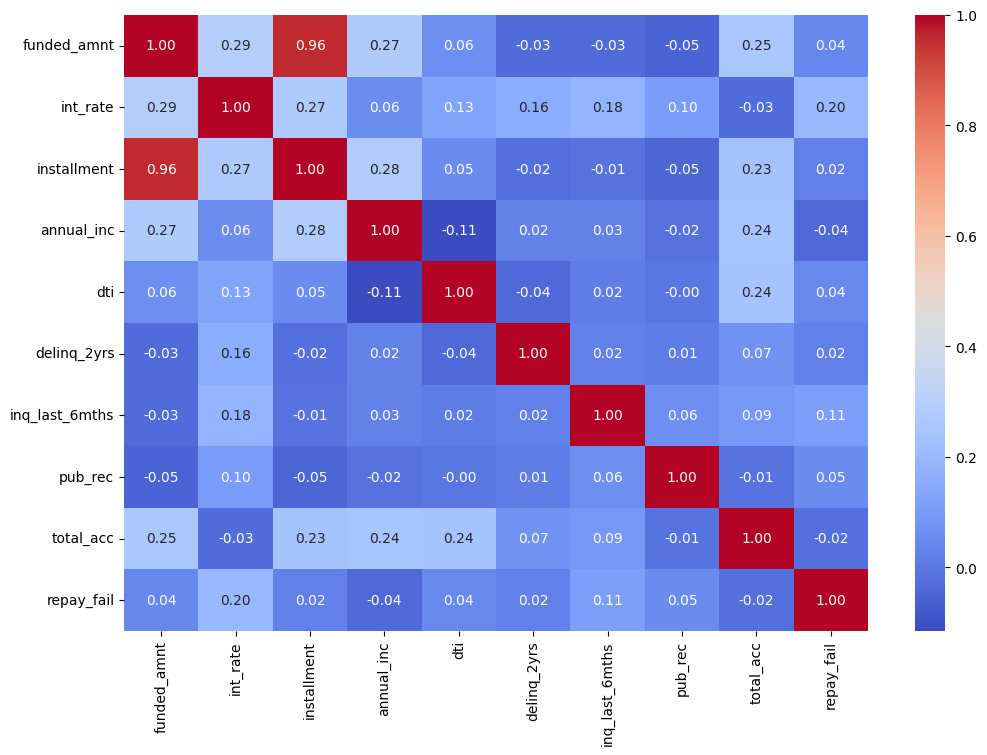

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = df_filtered.drop(columns="id").corr(numeric_only=True)

plt.figure(figsize=(12, 8))  # Adjust width and height as needed

sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

In [ ]:
# Filter rows where mths_since_last_delinq is missing (NaN)
missing_delinq_df = df[df["mths_since_last_delinq"].isna()]

# Display the filtered DataFrame
print(missing_delinq_df)

       Unnamed: 0       id  member_id  loan_amnt  funded_amnt  \
0               2        2          2        0.0          0.0   
1               3   545583     703644     2500.0       2500.0   
6               8   981465    1204637     8000.0       8000.0   
7               9   749050     948200     6000.0       6000.0   
8              10  1016373    1243872    25600.0      25600.0   
...           ...      ...        ...        ...          ...   
38473       38474   349588     351284     6000.0       6000.0   
38475       38476   849205    1060907     3000.0       3000.0   
38476       38477   852914    1065048    10400.0      10400.0   
38477       38478   519553     671637    16000.0      10550.0   
38478       38479   825638    1034448    10000.0      10000.0   

       funded_amnt_inv       term  int_rate  installment emp_length  ...  \
0              0.00000  36 months      0.00         0.00   < 1 year  ...   
1           2500.00000  36 months     13.98        85.42    4 years

<ipython-input-9-de33445c5e7f>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df["emp_length"], order=df["emp_length"].value_counts().index, palette="coolwarm")


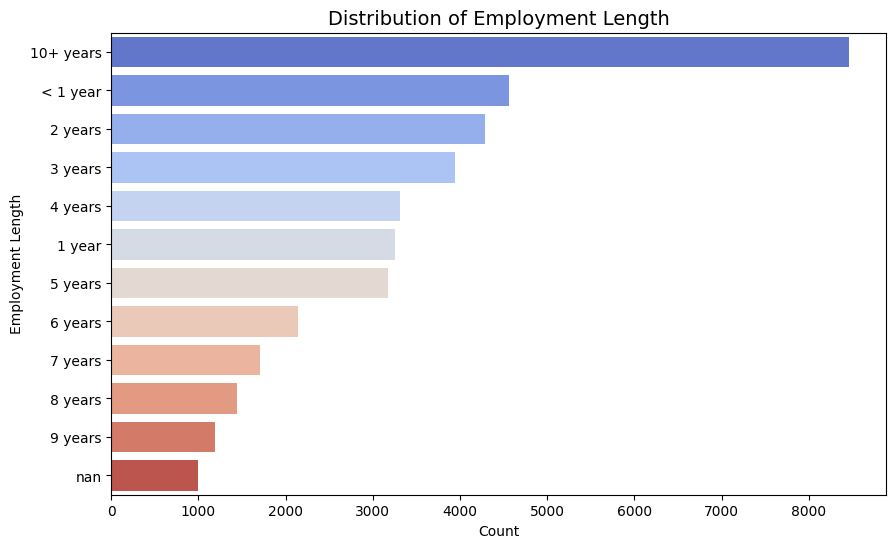

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Clean emp_length by converting it to string (in case of mixed types)
df["emp_length"] = df["emp_length"].astype(str)

# Set figure size
plt.figure(figsize=(10, 6))

# Create a bar plot for employment length counts
sns.countplot(y=df["emp_length"], order=df["emp_length"].value_counts().index, palette="coolwarm")

# Add title and labels
plt.title("Distribution of Employment Length", fontsize=14)
plt.xlabel("Count")
plt.ylabel("Employment Length")

# Show plot
plt.show()




```
# This is formatted as code
```Dummies for intervals?: <



In [ ]:
#drop all the rows that are missing information
df_filtered = df_filtered.dropna(subset=['emp_length'])
df_filtered.info()


<class 'pandas.core.frame.DataFrame'>
Index: 37487 entries, 0 to 38479
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   37487 non-null  int64  
 1   funded_amnt          37486 non-null  float64
 2   term                 37487 non-null  object 
 3   int_rate             37487 non-null  float64
 4   installment          37486 non-null  float64
 5   emp_length           37487 non-null  object 
 6   home_ownership       37487 non-null  object 
 7   annual_inc           37485 non-null  float64
 8   verification_status  37487 non-null  object 
 9   loan_status          37487 non-null  object 
 10  purpose              37487 non-null  object 
 11  zip_code             37487 non-null  object 
 12  addr_state           37487 non-null  object 
 13  dti                  37487 non-null  float64
 14  delinq_2yrs          37486 non-null  float64
 15  inq_last_6mths       37486 non-null  floa

In [ ]:
#cleaning up the column of "term" to contain int values of
# fyi there are only 2 varieties of terms in the whole dataset - 36 months and 60 months
df_filtered['term'] = df_filtered['term'].astype(str)
df_filtered['term'] = df_filtered['term'].str.extract('(\d+)').astype(int)

#turning employment into an int
df_filtered['emp_length'] = df_filtered['emp_length'].astype(str)

df_filtered.info()

#Creating a new column of employment length with dummy variables:
# <1 year - 0; 1 year - 1; 2 years - 2; ...; 10+ years - 10



<class 'pandas.core.frame.DataFrame'>
Index: 37487 entries, 0 to 38479
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   37487 non-null  int64  
 1   funded_amnt          37486 non-null  float64
 2   term                 37487 non-null  int64  
 3   int_rate             37487 non-null  float64
 4   installment          37486 non-null  float64
 5   emp_length           37487 non-null  object 
 6   home_ownership       37487 non-null  object 
 7   annual_inc           37485 non-null  float64
 8   verification_status  37487 non-null  object 
 9   loan_status          37487 non-null  object 
 10  purpose              37487 non-null  object 
 11  zip_code             37487 non-null  object 
 12  addr_state           37487 non-null  object 
 13  dti                  37487 non-null  float64
 14  delinq_2yrs          37486 non-null  float64
 15  inq_last_6mths       37486 non-null  floa

In [ ]:
dummies = []
for i in range(len(df_filtered)):
  if df_filtered['emp_length'][i] == '< 1 year':
    dummies.append(0)
  elif df_filtered['emp_length'][i] == '1 year':
    dummies.append(1)
  elif df_filtered['emp_length'][i] == '2 years':
    dummies.append(2)
  elif df_filtered['emp_length'][i] == '3 years':
    dummies.append(3)
  elif df_filtered['emp_length'][i] == '4 years':
    dummies.append(4)
  elif df_filtered['emp_length'][i] == '5 years':
    dummies.append(5)
  elif df_filtered['emp_length'][i] == '6 years':
    dummies.append(6)
  elif df_filtered['emp_length'][i] == '7 years':
    dummies.append(7)
  elif df_filtered['emp_length'][i] == '8 years':
    dummies.append(8)
  elif df_filtered['emp_length'][i] == '9 years':
    dummies.append(9)
  elif df_filtered['emp_length'][i] == '10+ years':
    dummies.append(10)


df_filtered[emp_length_dum] = dummies
df_filtered[emp_length_dum]
#df_filtered.info()

KeyError: 6